In [ ]:
# 라이브러리 로드
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from subprocess import check_output
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.cm as cm

plt.style.use('seaborn')
sns.set_palette("hls")

<ipython-input-1-a479e9f18028>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


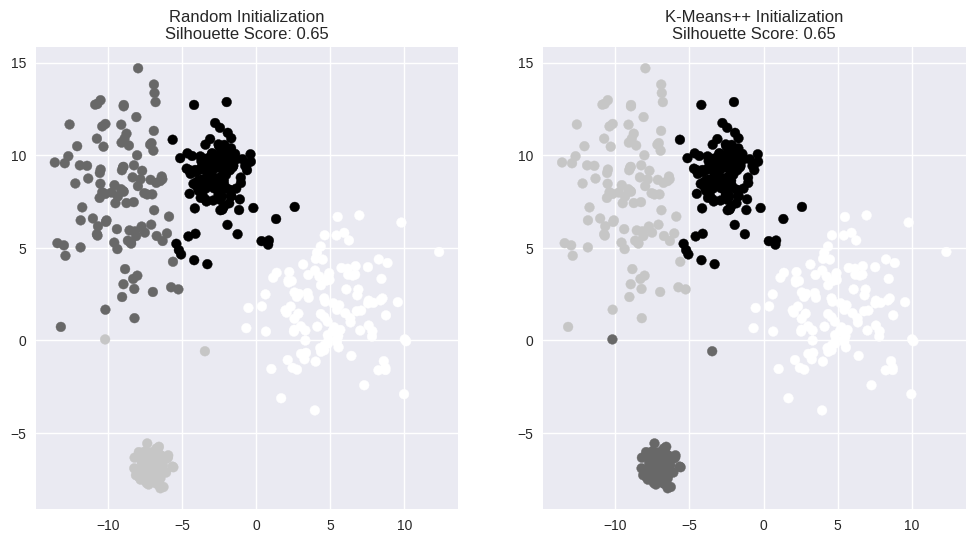

(0.6480615845843111, 0.6480615845843111)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 데이터셋 생성
X, y = make_blobs(n_samples=500, centers=4, cluster_std=[1.0, 2.5, 0.5, 3.0], random_state=42)

# `random` 초기화를 사용한 k-means 클러스터링을 수행합니다.
km_random = KMeans(n_clusters=4, init='random', n_init=1, max_iter=300, random_state=42)
y_km_random = km_random.fit_predict(X)

# `k-means++` 초기화를 사용한 k-means 클러스터링을 수행합니다.
km_plusplus = KMeans(n_clusters=4, init='k-means++', n_init=1, max_iter=300, random_state=42)
y_km_plusplus = km_plusplus.fit_predict(X)

# 실루엣 점수를 계산합니다.
silhouette_random = silhouette_score(X, y_km_random)
silhouette_plusplus = silhouette_score(X, y_km_plusplus)

# 클러스터링 결과를 시각화합니다.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_km_random)
plt.title(f'Random Initialization\nSilhouette Score: {silhouette_random:.2f}')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_km_plusplus)
plt.title(f'K-Means++ Initialization\nSilhouette Score: {silhouette_plusplus:.2f}')

plt.show()

# 결과 반환
(silhouette_random, silhouette_plusplus)

In [ ]:
# 데이터 불러오기 (유방암 데이터)
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# diagnosis 제외 모두 수치형, unnamed 모두 결측치
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# id, unnamed 열 제거
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 데이터 처리
data_cleaned = data.drop(['id', 'Unnamed: 32'], axis=1)
data_cleaned['diagnosis'] = data_cleaned['diagnosis'].map({'M': 1, 'B': 0})

# 특성과 레이블 분리
X = data_cleaned.drop('diagnosis', axis=1).values
y = data_cleaned['diagnosis'].values

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

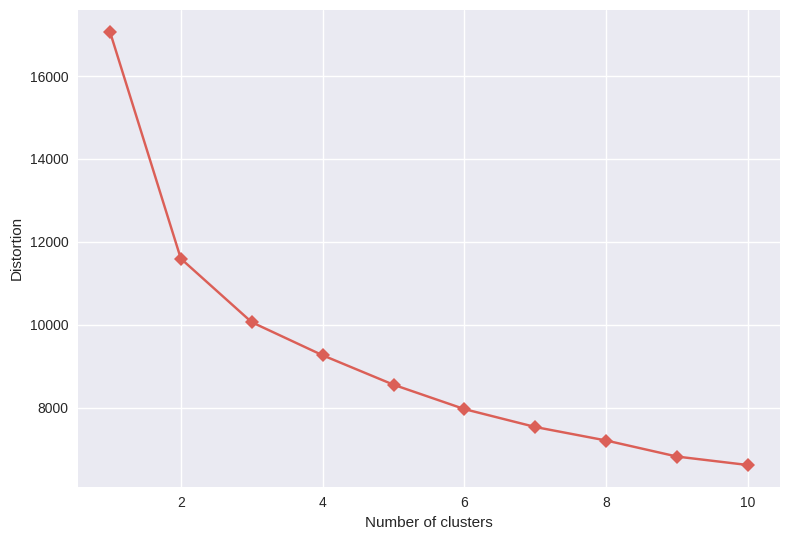

In [ ]:
# KMeans 클러스터링 왜곡 그래프를 위한 준비
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X_scaled)
    distortions.append(km.inertia_)

# 왜곡 그래프 그리기
plt.plot(range(1, 11), distortions, marker='D')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [ ]:
# 차원 축소를 위한 라이브러리 설치
from sklearn.decomposition import PCA

In [ ]:
# PCA 모델을 생성하고, 2개의 주성분으로 데이터를 축소합니다.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 축소된 데이터의 형태를 확인합니다.
X_pca.shape

(569, 2)

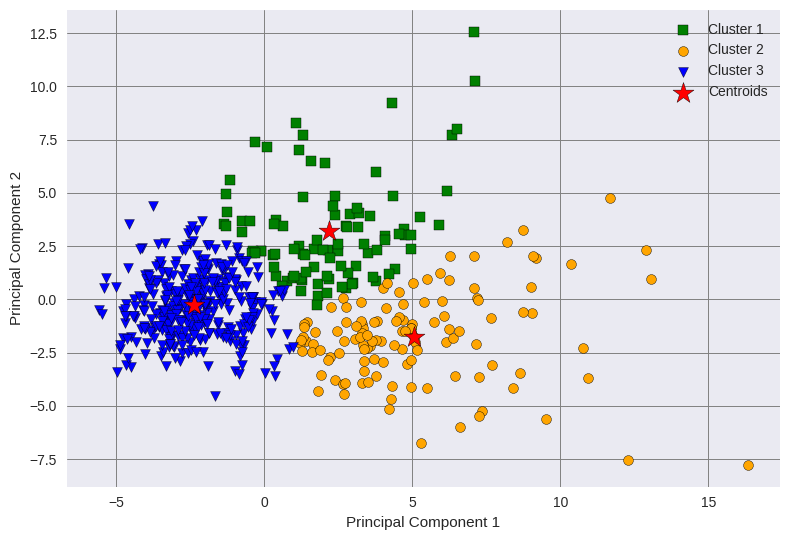

In [ ]:
# KMeans 클러스터링을 적용합니다.
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X_pca)

# 클러스터링 결과 시각화
plt.scatter(X_pca[y_km == 0, 0], X_pca[y_km == 0, 1], s=50, c='green', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X_pca[y_km == 1, 0], X_pca[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X_pca[y_km == 2, 0], X_pca[y_km == 2, 1], s=50, c='blue', marker='v', edgecolor='black', label='Cluster 3')

# 클러스터 중심 시각화
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(scatterpoints=1)
plt.grid(which='major', linestyle='-', linewidth='0.7', color='grey')
plt.tight_layout()
plt.show()

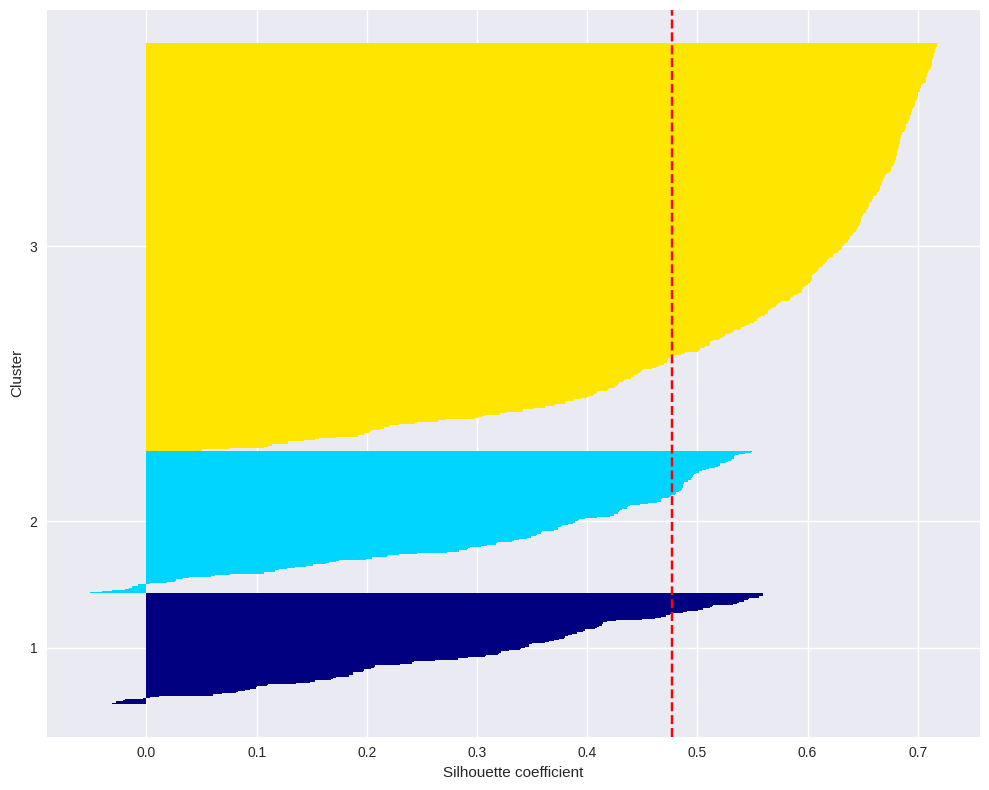

0.4766724460749784

In [ ]:
#라이브러리 로드
from sklearn.metrics import silhouette_samples

# 실루엣 계수를 계산합니다.
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_pca, y_km, metric='euclidean')

# 실루엣 그래프를 그리기 위한 준비
y_ax_lower, y_ax_upper = 0, 0
yticks = []
plt.figure(figsize=(10, 8))

# 각 클러스터에 대한 실루엣 계수의 분포를 그래프에 표시합니다.
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

# 평균 실루엣 계수의 선을 그립니다.
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

# 클러스터 레이블을 y축에 표시합니다.
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

# 평균 실루엣 계수를 출력합니다.
silhouette_avg


In [ ]:
# 라이브러리 로드
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# 데이터셋 준비
df = pd.DataFrame(X_pca)
labels = df.index  # 데이터프레임 인덱스를 레이블로 사용

# 계층적 클러스터링을 위한 거리 행렬 계산
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')))

row_dist

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
0,0.000000,8.887620,4.594276,8.580411,6.544126,7.100476,8.359080,7.060410,6.188553,6.439247,...,10.303101,9.905578,14.642949,3.616686,2.562527,6.173486,7.730725,8.821554,1.213884,14.900097
1,8.887620,0.000000,4.295182,14.820556,2.389042,7.718104,1.088377,6.113307,7.203120,12.159598,...,6.140414,4.596046,7.440441,8.064353,7.111335,4.056030,1.417589,2.182214,9.663727,8.451166
2,4.594276,4.295182,0.000000,11.435440,1.999223,6.041409,3.850049,4.955550,5.148039,8.824005,...,7.222505,6.280080,10.656649,4.561512,3.048939,2.599199,3.171757,4.553469,5.393047,11.216437
3,8.580411,14.820556,11.435440,0.000000,12.632458,7.906152,13.855015,9.368386,7.935572,2.662551,...,12.170949,12.927094,17.255852,6.899061,10.969485,13.869266,14.253967,13.517394,9.197611,16.689350
4,6.544126,2.389042,1.999223,12.632458,0.000000,6.099558,1.851578,4.647680,5.393750,9.972441,...,5.979210,4.758531,8.807514,5.781189,4.998645,2.987122,1.642120,2.679514,7.387290,9.496852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.173486,4.056030,2.599199,13.869266,2.987122,8.551488,4.293020,7.312139,7.695327,11.304331,...,8.966317,7.710594,11.401653,7.078705,3.783794,0.000000,2.645943,5.446918,6.560349,12.263874
565,7.730725,1.417589,3.171757,14.253967,1.642120,7.665361,1.793246,6.149798,7.003222,11.596938,...,6.901119,5.466074,8.784680,7.379050,5.791678,2.645943,0.000000,3.043959,8.422655,9.715729
566,8.821554,2.182214,4.553469,13.517394,2.679514,5.959201,1.259457,4.334297,5.631090,10.894564,...,3.963657,2.448183,6.130760,7.122252,7.602129,5.446918,3.043959,0.000000,9.794121,6.843174
567,1.213884,9.663727,5.393047,9.197611,7.387290,8.312743,9.231492,8.258575,7.402422,7.269795,...,11.470439,11.013066,15.712316,4.810908,2.777064,6.560349,8.422655,9.794121,0.000000,16.022225


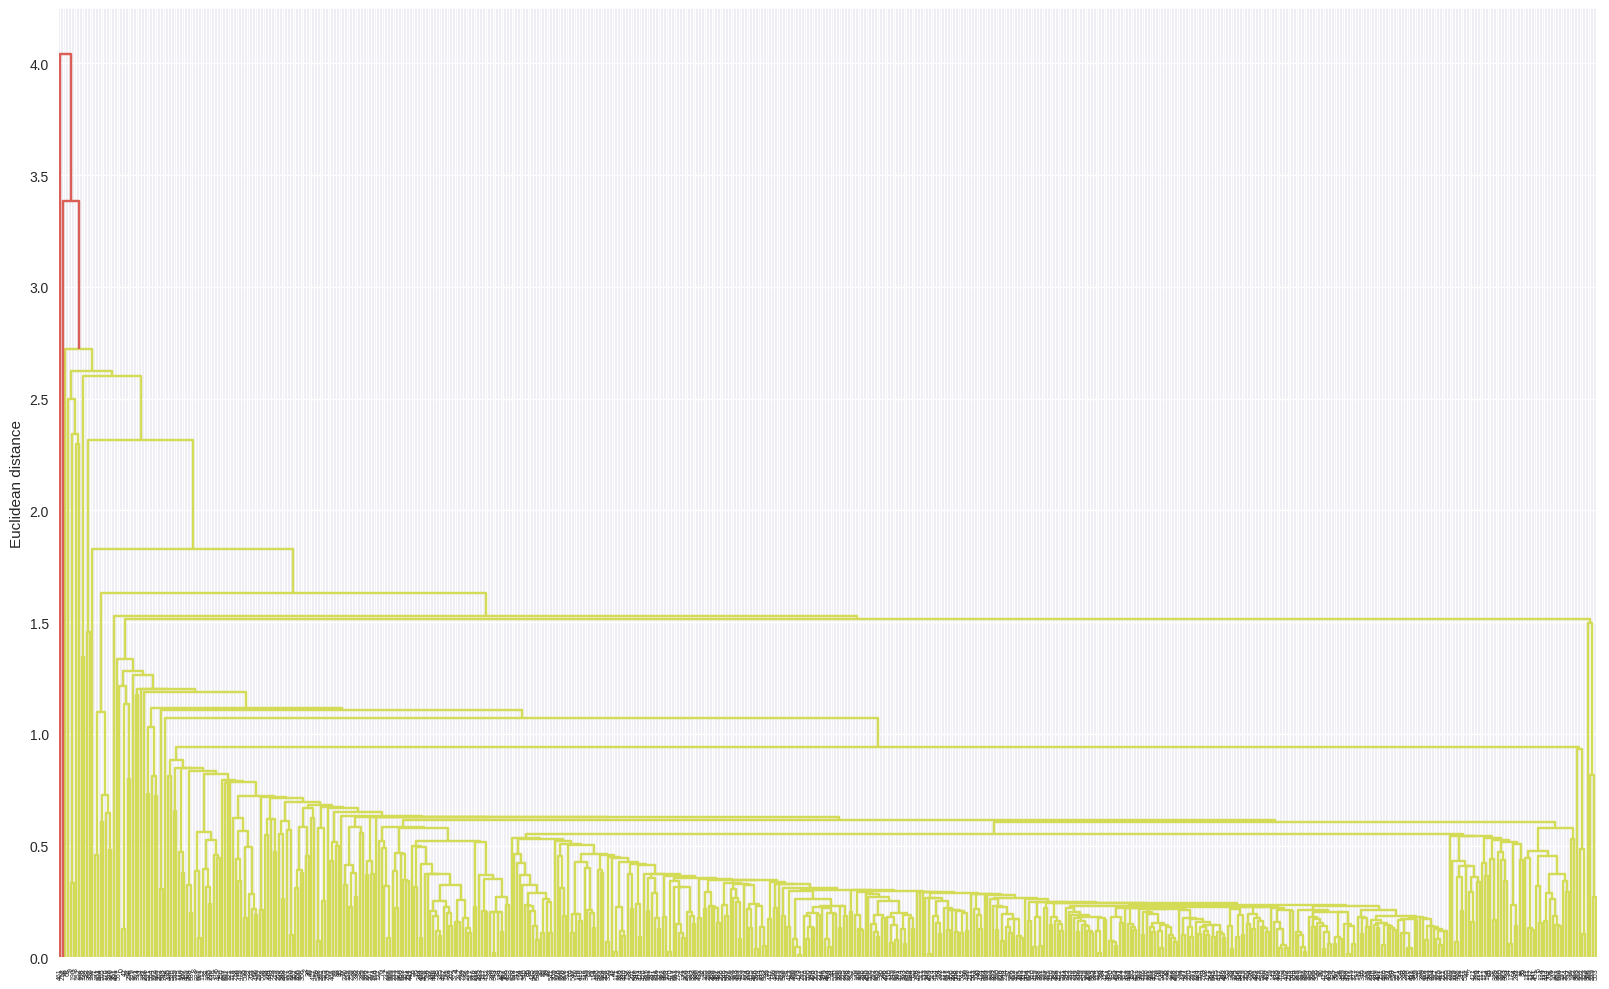

In [ ]:
# 계층적 클러스터링 수행 (single linkage (군집 간 element 끼리의 거리 중 min을 군집 간 거리로 설정))
row_clusters1 = linkage(df.values, method='single', metric='euclidean')
row_clusters_df1 = pd.DataFrame(row_clusters1,
                               columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
                               index=[f'cluster {(i + 1)}' for i in range(row_clusters1.shape[0])])

# 덴드로그램 생성
plt.figure(figsize=(16, 10))
row_dendr1 = dendrogram(row_clusters1, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

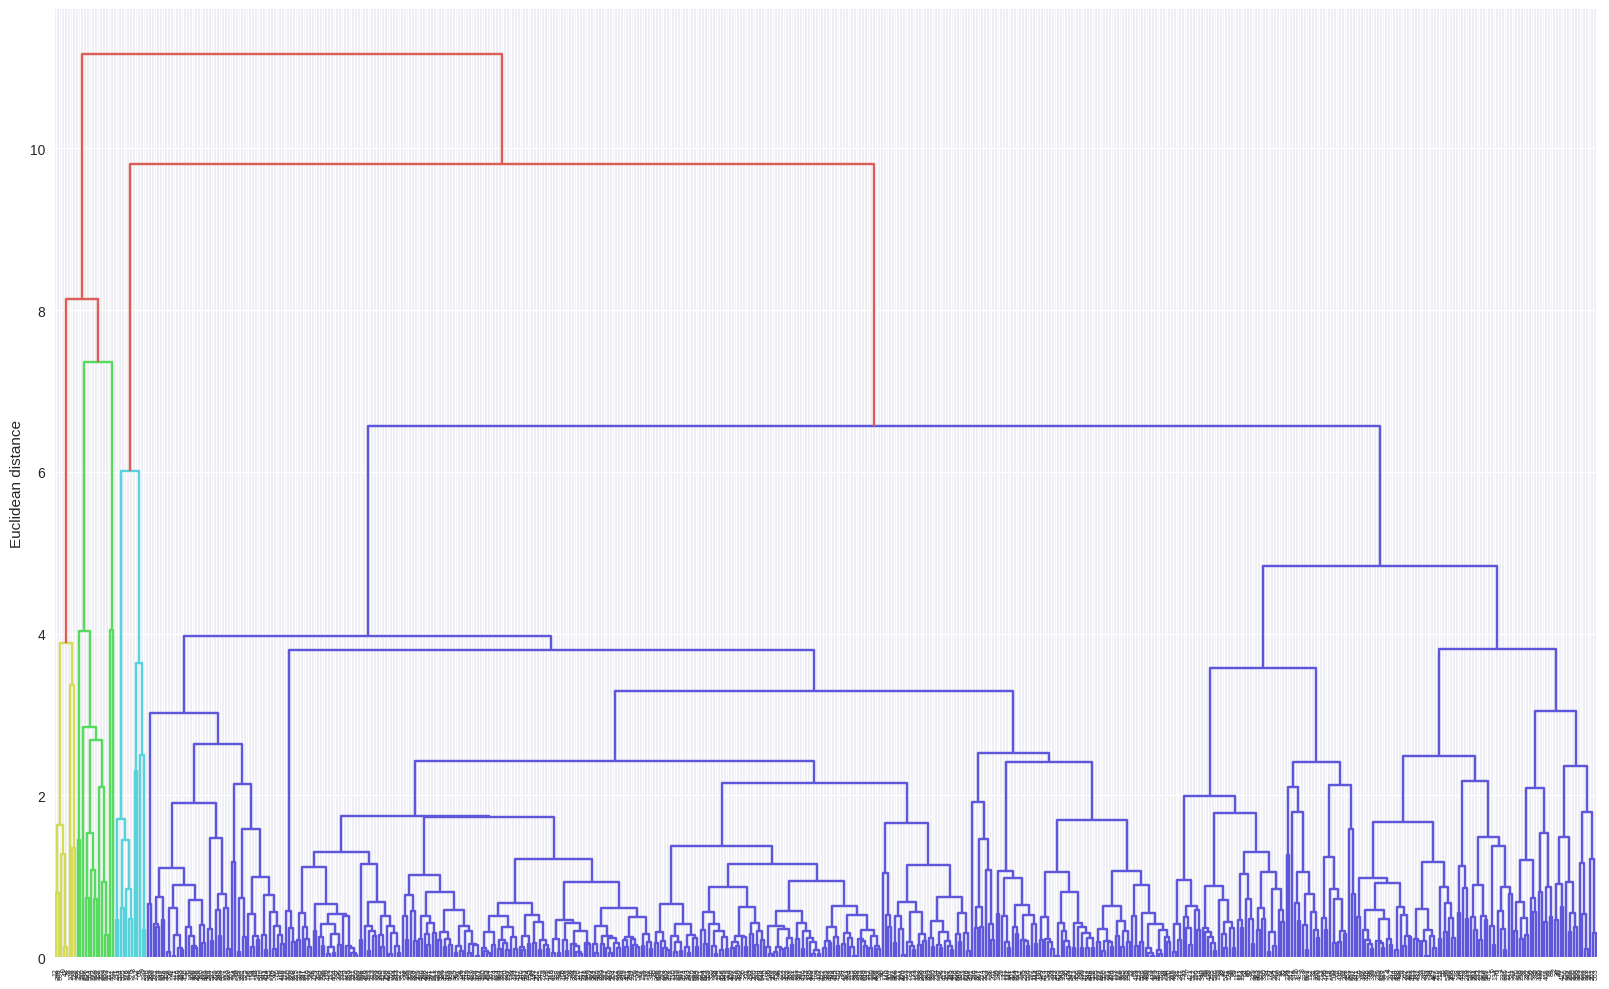

In [ ]:
# 계층적 클러스터링 수행 (average linkage (군집 간 element끼리의 모든 거리를  average))
row_clusters2 = linkage(df.values, method='average', metric='euclidean')
row_clusters_df2 = pd.DataFrame(row_clusters2,
                               columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
                               index=[f'cluster {(i + 1)}' for i in range(row_clusters2.shape[0])])

# 덴드로그램 생성
plt.figure(figsize=(16, 10))
row_dendr2 = dendrogram(row_clusters2, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

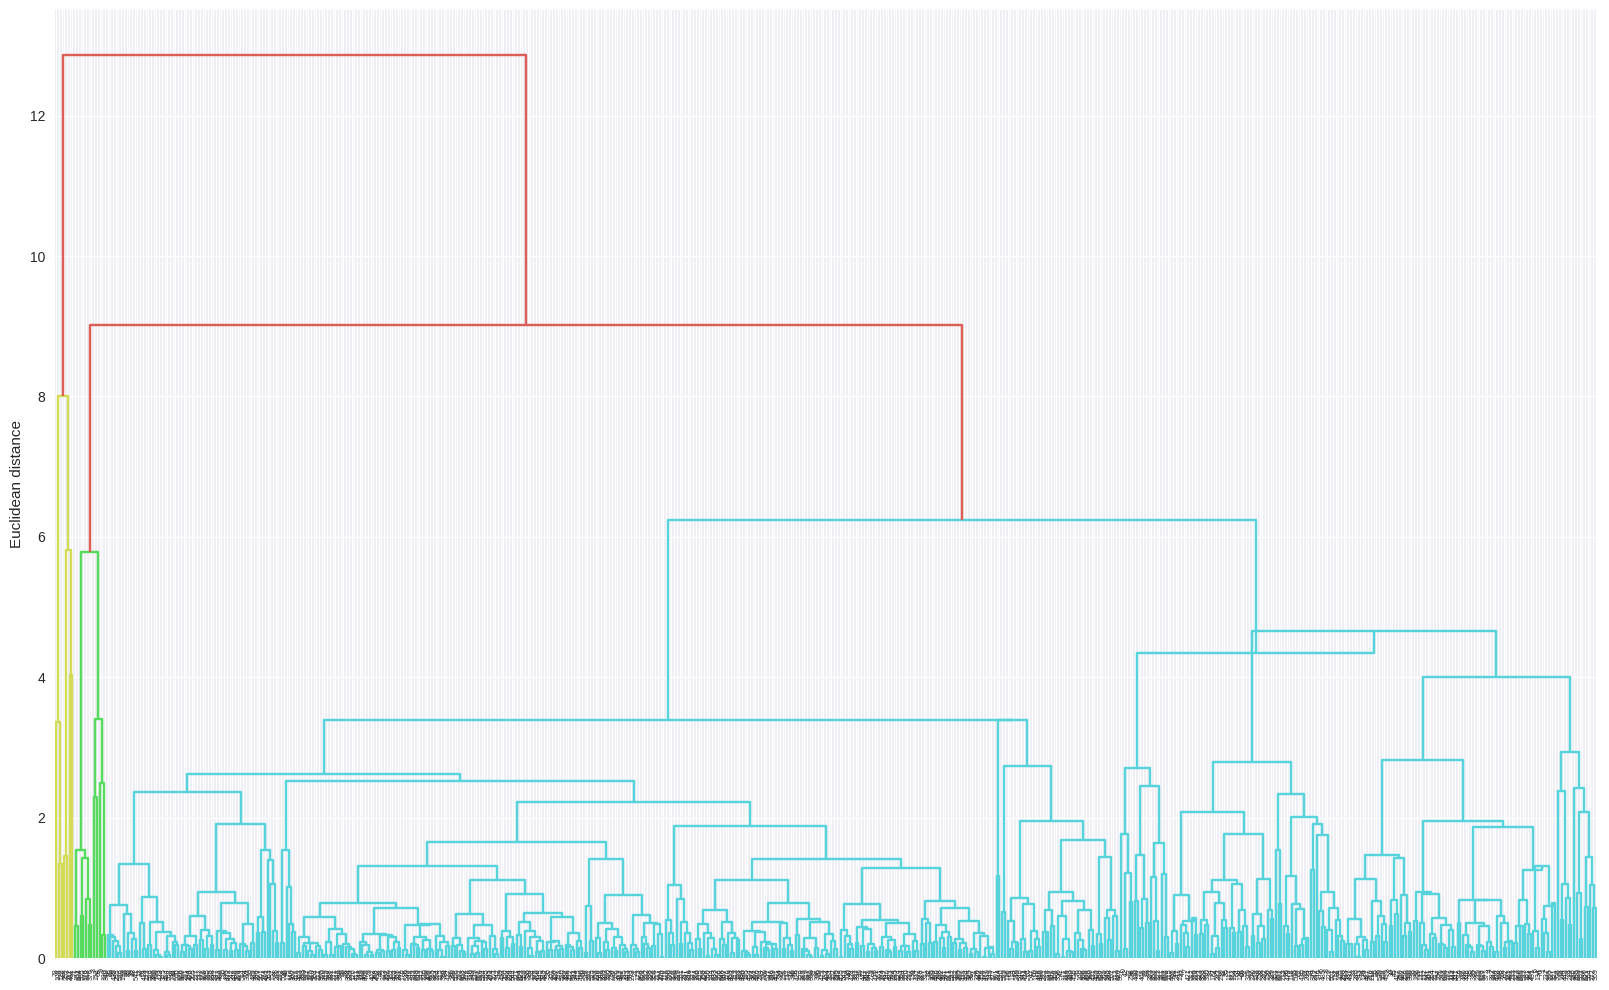

In [ ]:
# 계층적 클러스터링 수행 (centroid (군집의 centroid끼리의 거리))
row_clusters3 = linkage(df.values, method='centroid', metric='euclidean')
row_clusters_df3 = pd.DataFrame(row_clusters3,
                               columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
                               index=[f'cluster {(i + 1)}' for i in range(row_clusters3.shape[0])])

# 덴드로그램 생성
plt.figure(figsize=(16, 10))
row_dendr3 = dendrogram(row_clusters3, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

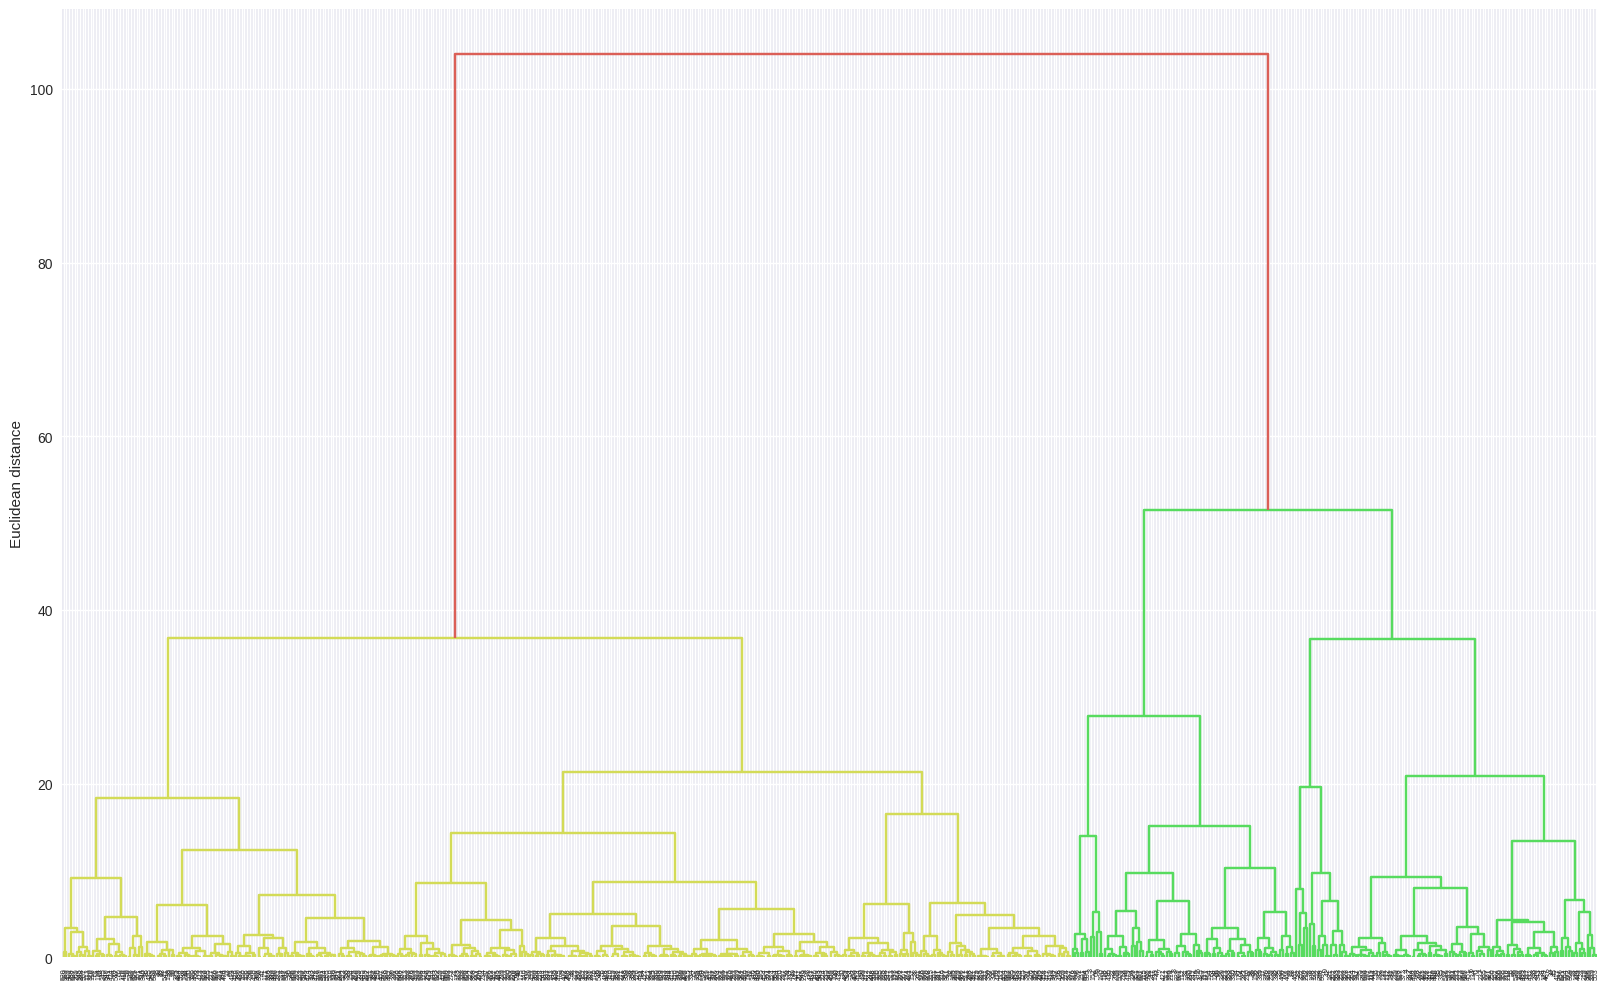

In [ ]:
# 계층적 클러스터링 수행 (ward (두 군집 간 제곱합 - (군집 내 제곱합의 합)))
row_clusters4 = linkage(df.values, method='ward', metric='euclidean')
row_clusters_df4 = pd.DataFrame(row_clusters4,
                               columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
                               index=[f'cluster {(i + 1)}' for i in range(row_clusters4.shape[0])])

# 덴드로그램 생성
plt.figure(figsize=(16, 10))
row_dendr4 = dendrogram(row_clusters4, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

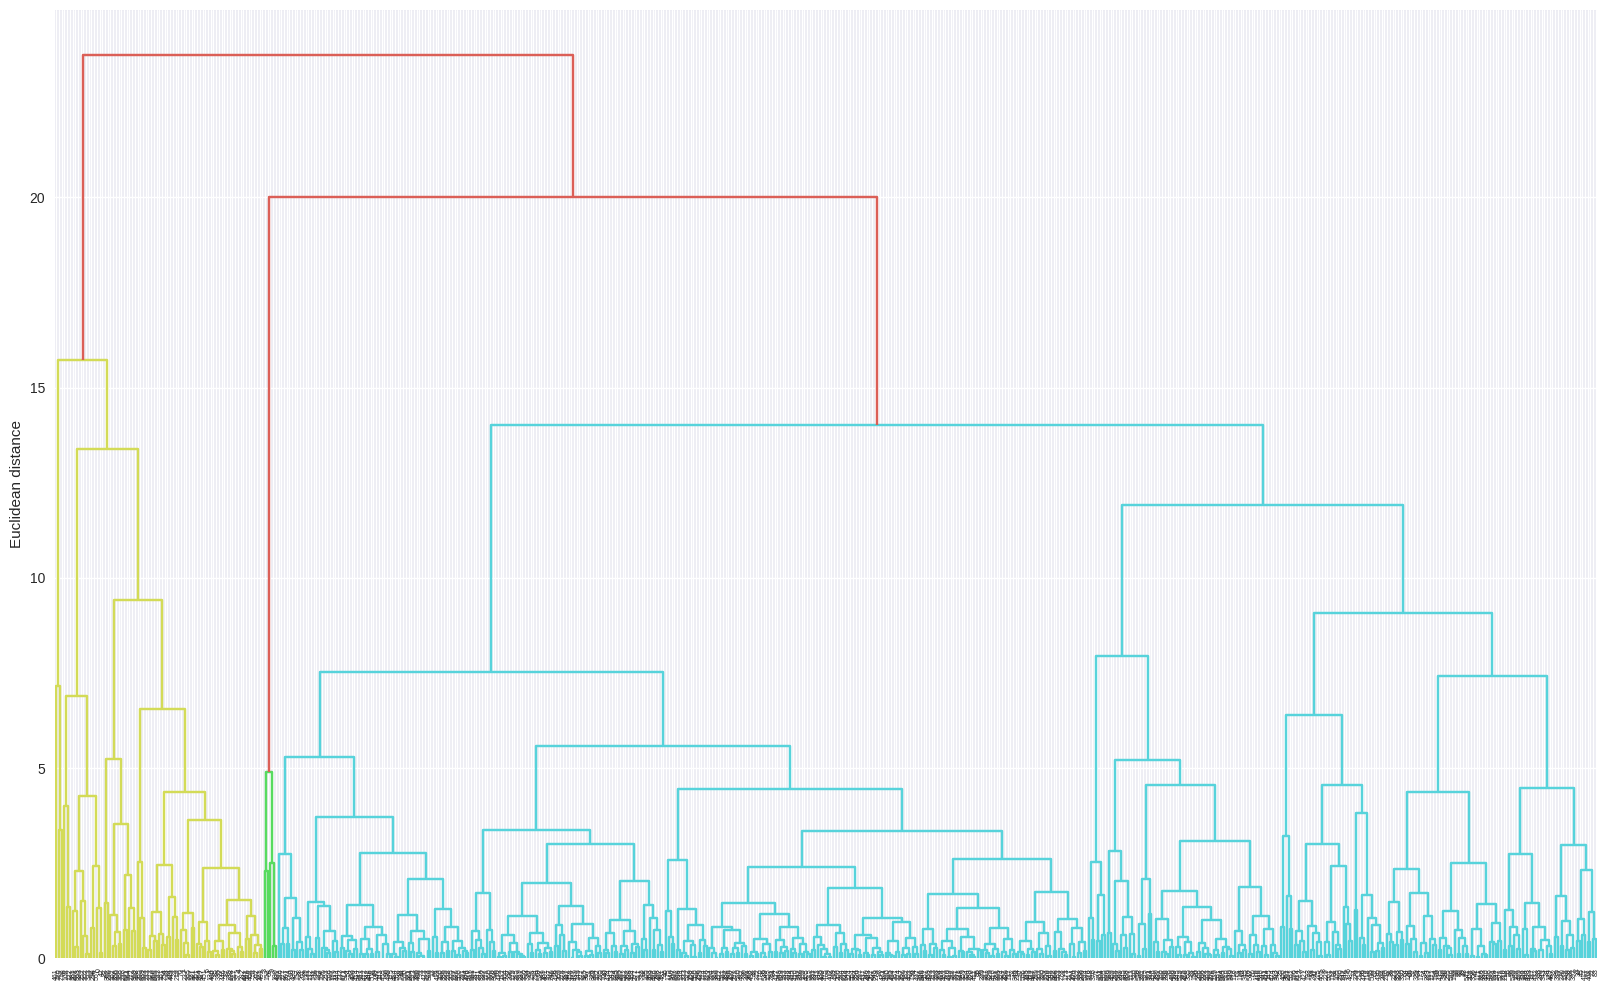

In [ ]:
# 계층적 클러스터링 수행 (complete linkage (두 군집 간 제곱합 - (군집 내 제곱합의 합)))
row_clusters5 = linkage(df.values, method='complete', metric='euclidean')
row_clusters_df5 = pd.DataFrame(row_clusters5,
                               columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
                               index=[f'cluster {(i + 1)}' for i in range(row_clusters5.shape[0])])

# 덴드로그램 생성
plt.figure(figsize=(16, 10))
row_dendr5 = dendrogram(row_clusters5, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

<ipython-input-17-3578d1a1c436>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns), rotation=90)
<ipython-input-17-3578d1a1c436>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


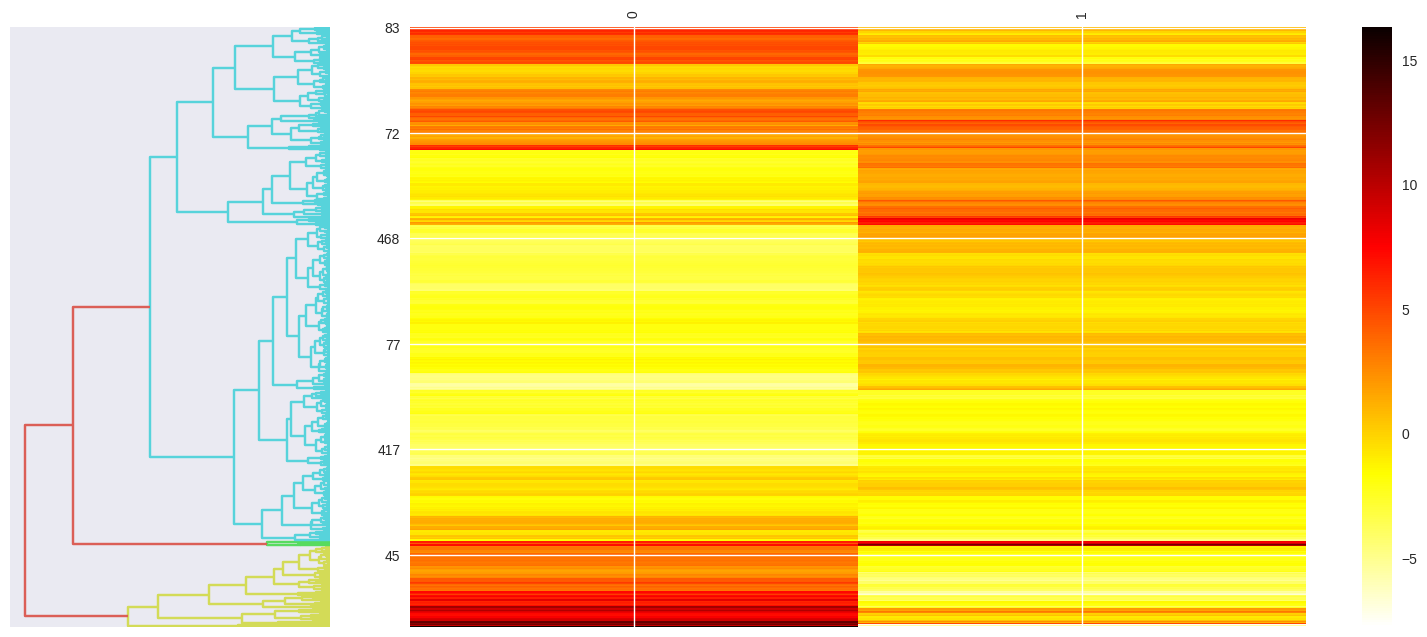

In [ ]:
# 덴드로그램과 함께 히트맵을 그리는 코드 실행
fig = plt.figure(figsize=(16, 10), facecolor='white')
axd = fig.add_axes([0.05, 0.1, 0.2, 0.6])

# 덴드로그램 생성 (여기서는 'left' 방향으로 설정)
row_dendr = dendrogram(row_clusters5, orientation='left')

# 데이터프레임의 행을 클러스터링 결과에 따라 재정렬
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

# 덴드로그램 축 설정
axd.set_xticks([])
axd.set_yticks([])

# 덴드로그램의 축 테두리 제거
for i in axd.spines.values():
    i.set_visible(False)

# 히트맵 생성
axm = fig.add_axes([0.3, 0.1, 0.7, 0.6])  # x 위치, y 위치, 너비, 높이
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r', aspect='auto')
fig.colorbar(cax)

# 축의 눈금을 제거합니다
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)

# 히트맵 눈금 레이블 설정
axm.set_xticklabels([''] + list(df_rowclust.columns), rotation=90)
axm.set_yticklabels([''] + list(df_rowclust.index))

plt.show()

In [ ]:
# 라이브러리 설치
from sklearn.cluster import AgglomerativeClustering

# 계층적 클러스터링을 사용하여 레이블 예측 (3개의 군)
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels_3_clusters = ac.fit_predict(df)

labels_3_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
# 계층적 클러스터링을 사용하여 레이블 예측 (2개의 군)
ac2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels_2_clusters = ac2.fit_predict(df)
labels_2_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
# DBSCAN 실습

In [ ]:
# 데이터 불러오기
dataset = pd.read_csv('Mall_Customers.csv')
del dataset['CustomerID']

In [ ]:
# gender 제외 모두 수치형
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
#거리 계산 위해 gender는 one-hot encoding 해주기
dataset['Gender'].replace({'Male':0, 'Female':1}, inplace=True)

In [ ]:
dataset.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [ ]:
#결측치 확인
dataset.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

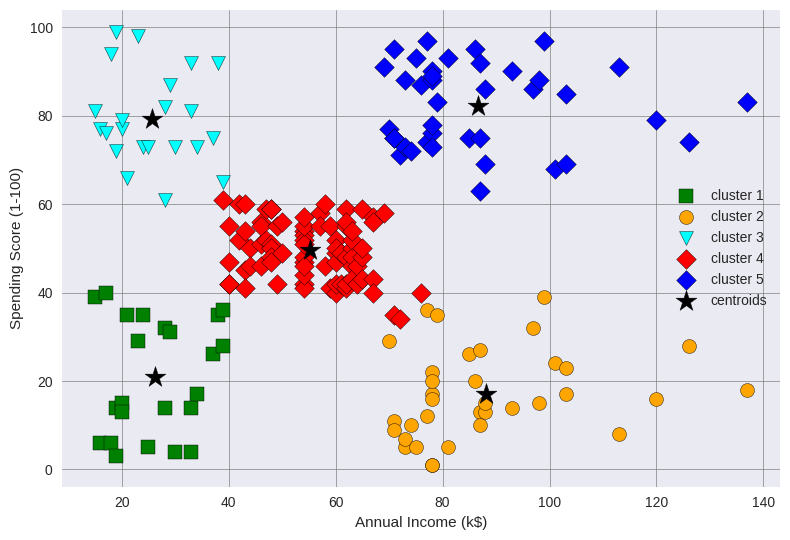

In [ ]:
# 데이터 클러스터링 (k-means)
X22 = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values

km = KMeans(
    n_clusters=5,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)

y_km22 = km.fit_predict(X22)

# Plot the clusters
plt.scatter(
    X22[y_km22 == 0, 0], X22[y_km22 == 0, 1],
    s=100, c='green',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X22[y_km22 == 1, 0], X22[y_km22 == 1, 1],
    s=100, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X22[y_km22 == 2, 0], X22[y_km22 == 2, 1],
    s=100, c='cyan',
    marker='v', edgecolor='black',
    label='cluster 3'
)
plt.scatter(
    X22[y_km22 == 3, 0], X22[y_km22 == 3, 1],
    s=100, c='red',
    marker='D', edgecolor='black',
    label='cluster 4'
)
plt.scatter(
    X22[y_km22 == 4, 0], X22[y_km22 == 4, 1],
    s=100, c='blue',
    marker='D', edgecolor='black',
    label='cluster 5'
)

# Plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids'
)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(scatterpoints=1)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.tight_layout()
plt.show()

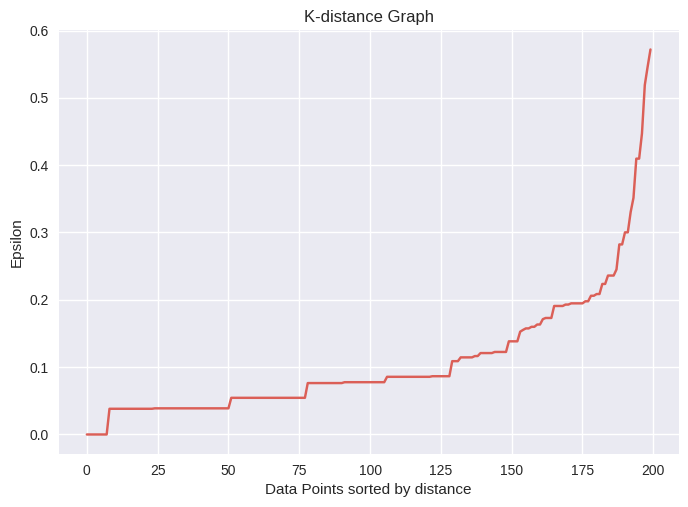

In [ ]:
# 라이브러리 설치
from sklearn.neighbors import NearestNeighbors

# 'Annual Income (k$)'와 'Spending Score (1-100)' 선택
X33 = dataset.iloc[:, [2, 3]].values

# 데이터 정규화
scaler = StandardScaler()
X_scaled33 = scaler.fit_transform(X33)

# NearestNeighbors 모델 생성 및 학습
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_scaled33)
distances, indices = neighbors_fit.kneighbors(X_scaled33)

# 거리를 오름차순으로 정렬
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# 거리 그래프 그리기
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

<ipython-input-28-231582f82384>:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_scaled33[y_db == -1, 0], X_scaled33[y_db == -1, 1], s=50, c='black', marker='x', edgecolor='black', label='Noise')


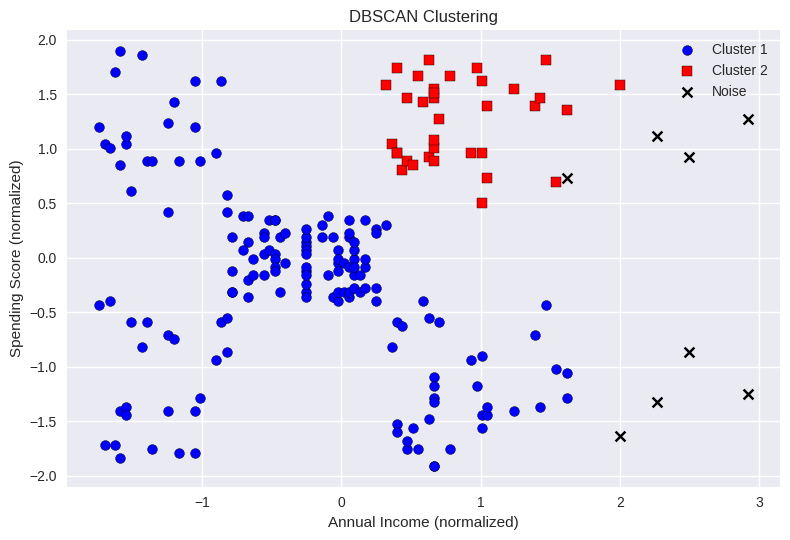

In [ ]:
# DBSCAN 라이브러리 설치
from sklearn.cluster import DBSCAN

# DBSCAN 모델 생성 및 학습
db = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X_scaled33)

# 클러스터링 결과 시각화
plt.scatter(X_scaled33[y_db == 0, 0], X_scaled33[y_db == 0, 1], s=50, c='blue', marker='o', edgecolor='black', label='Cluster 1')
plt.scatter(X_scaled33[y_db == 1, 0], X_scaled33[y_db == 1, 1], s=50, c='red', marker='s', edgecolor='black', label='Cluster 2')
plt.scatter(X_scaled33[y_db == -1, 0], X_scaled33[y_db == -1, 1], s=50, c='black', marker='x', edgecolor='black', label='Noise')

plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (normalized)')
plt.ylabel('Spending Score (normalized)')
plt.legend()
plt.tight_layout()
plt.show()